In [10]:
import numpy as np

from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt

# Interactive plots so that I can pick out the correct pixel coordinates
%matplotlib notebook

In [11]:
img_heightmap_path = "../models/terrain-rgb/terrain-heightmap-rgb.png"

<IPython.core.display.Javascript object>


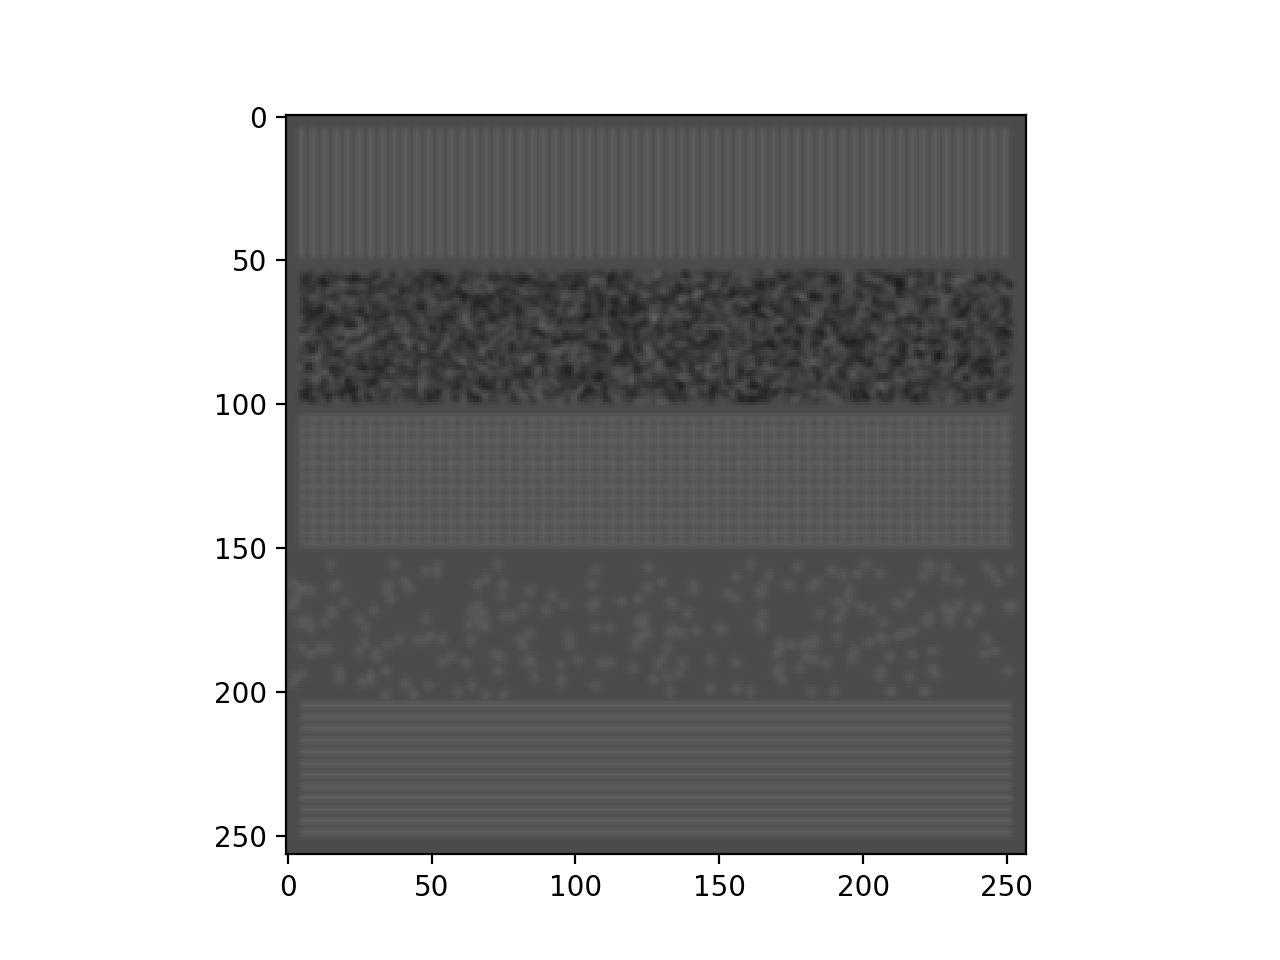

In [12]:
img_heightmap = imread(img_heightmap_path)
plt.imshow(img_heightmap);

In [17]:
hm_min, hm_max = np.min(img_heightmap), np.max(img_heightmap)
img_heightmap.shape, hm_min, hm_max

((257, 257, 3), 0.11764706, 0.3764706)

In [14]:
# Original heightmap is Low-High-Medium (high in middle)
low_start_idx = 53
low_final_idx = 101
low_range = range(low_start_idx, low_final_idx)

low_mobility_patch = img_heightmap[low_range, :, :]

high_start_idx = 103
high_final_idx = 151
high_range = range(high_start_idx, high_final_idx)

high_mobility_patch = img_heightmap[high_range, :, :]

med_start_idx = 155
med_final_idx = 203
med_range = range(med_start_idx, med_final_idx)

med_mobility_patch = img_heightmap[med_range, : , :]

len(list(low_range)) == len(list(high_range)) == len(list(med_range))

True

<IPython.core.display.Javascript object>


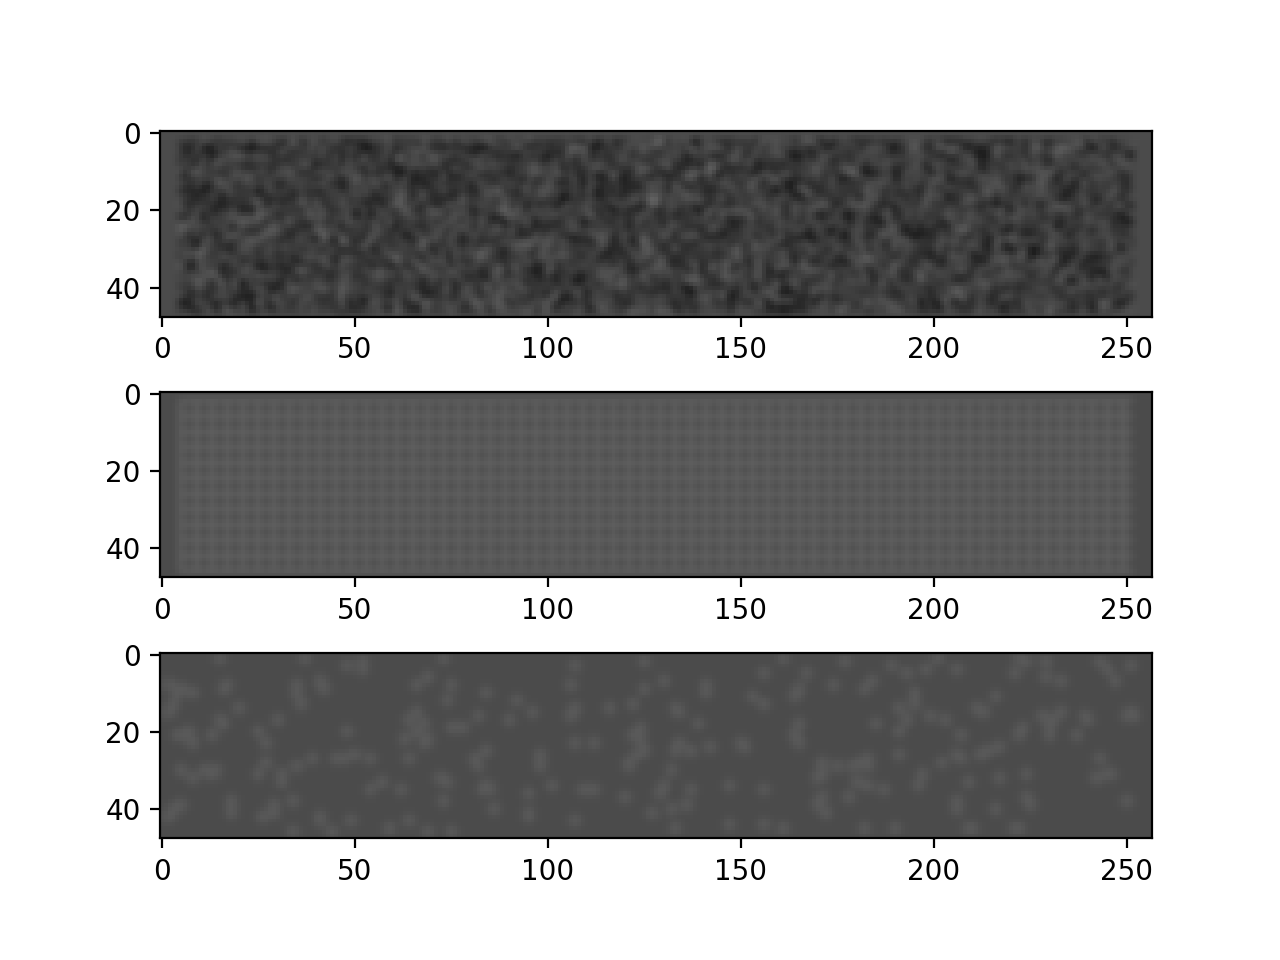

In [42]:
fig, (ax_low, ax_high, ax_med) = plt.subplots(3, 1)
ax_low.imshow(low_mobility_patch)
ax_high.imshow(high_mobility_patch)
ax_med.imshow(med_mobility_patch)

<IPython.core.display.Javascript object>


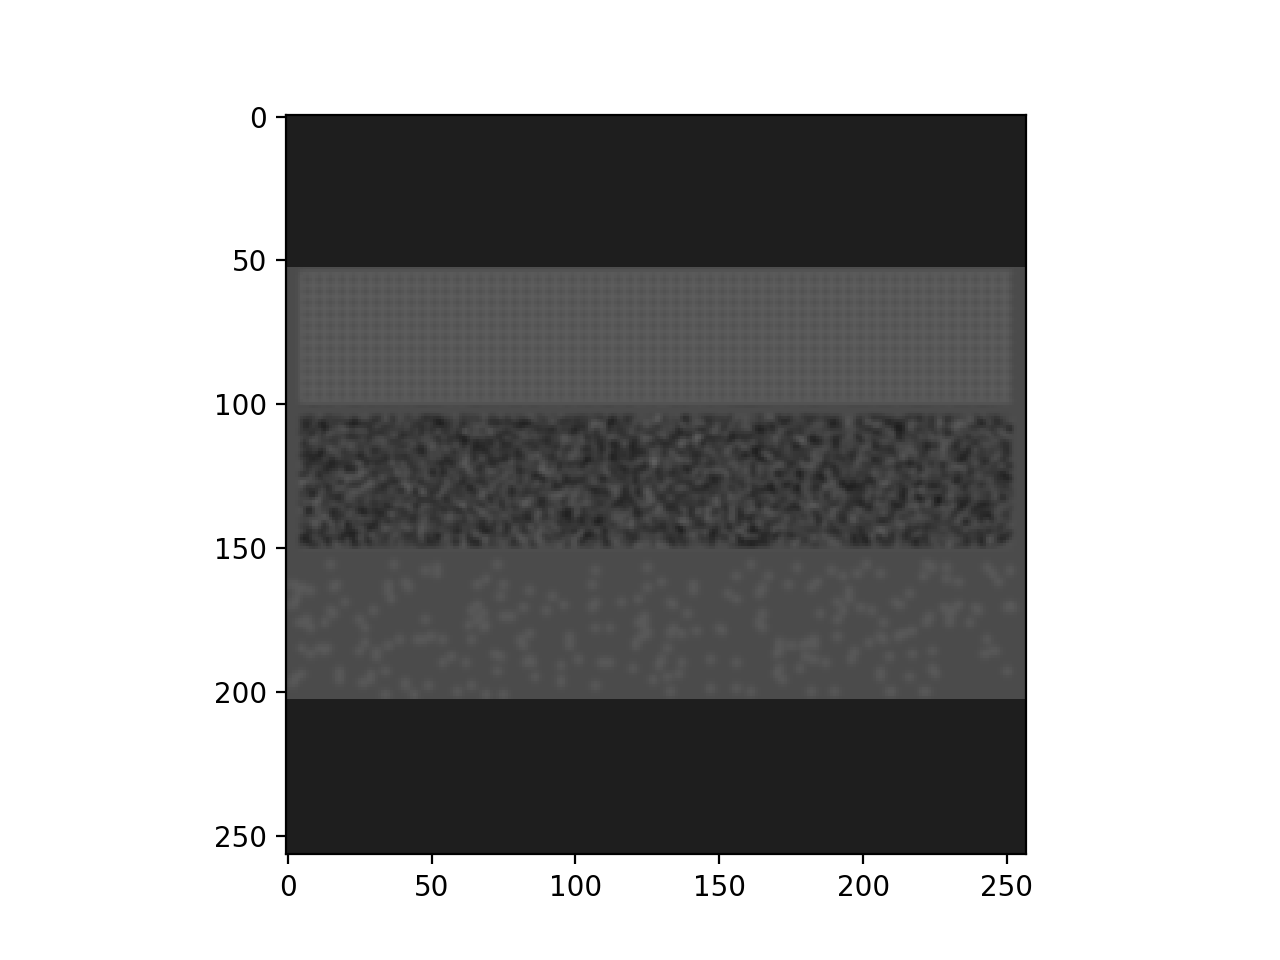

In [45]:
# Create High-Low-Medium (low in middle)
# Swap High and Low

low_hm = img_heightmap.copy()
low_hm[high_range, :, :], low_hm[low_range, :, :] = low_hm[low_range, :, :], low_hm[high_range, :, :]
low_hm[:low_start_idx, :, :] = hm_min
low_hm[med_final_idx:, :, :] = hm_min

plt.imshow(low_hm)

In [46]:
low_hm_path = 'terrain-heightmap-low.png'
plt.imsave(low_hm_path, low_hm)

<IPython.core.display.Javascript object>


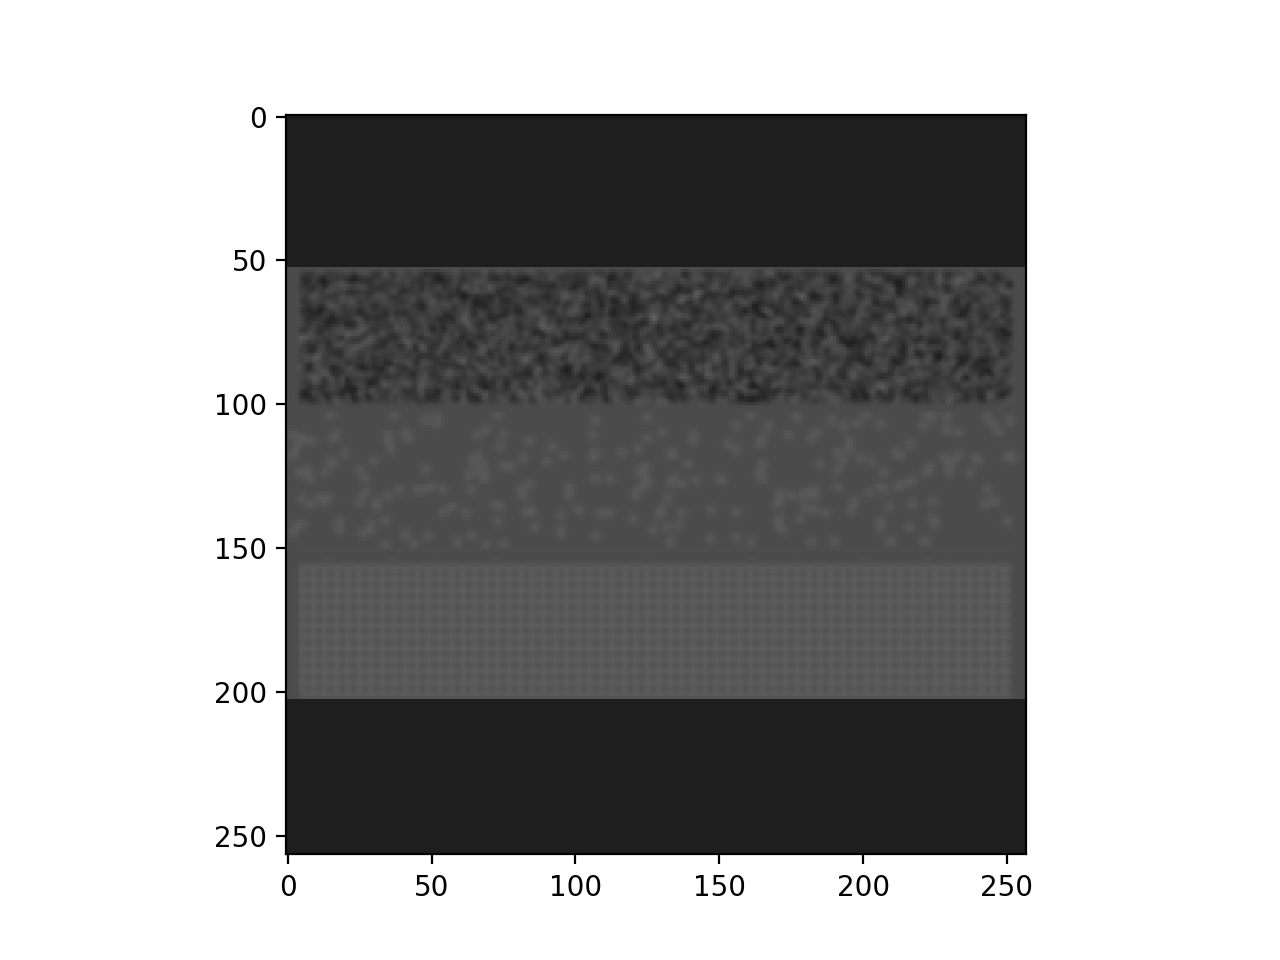

In [48]:
# Create Low-Medium-High (medium in middle)
# Swap High and Medium

med_hm = img_heightmap.copy()
med_hm[high_range, :, :], med_hm[med_range, :, :] = med_hm[med_range, :, :], med_hm[high_range, :, :]
med_hm[:low_start_idx, :, :] = hm_min
med_hm[med_final_idx:, :, :] = hm_min

plt.imshow(med_hm)

In [49]:
med_hm_path = 'terrain-heightmap-med.png'
plt.imsave(med_hm_path, med_hm)

<IPython.core.display.Javascript object>


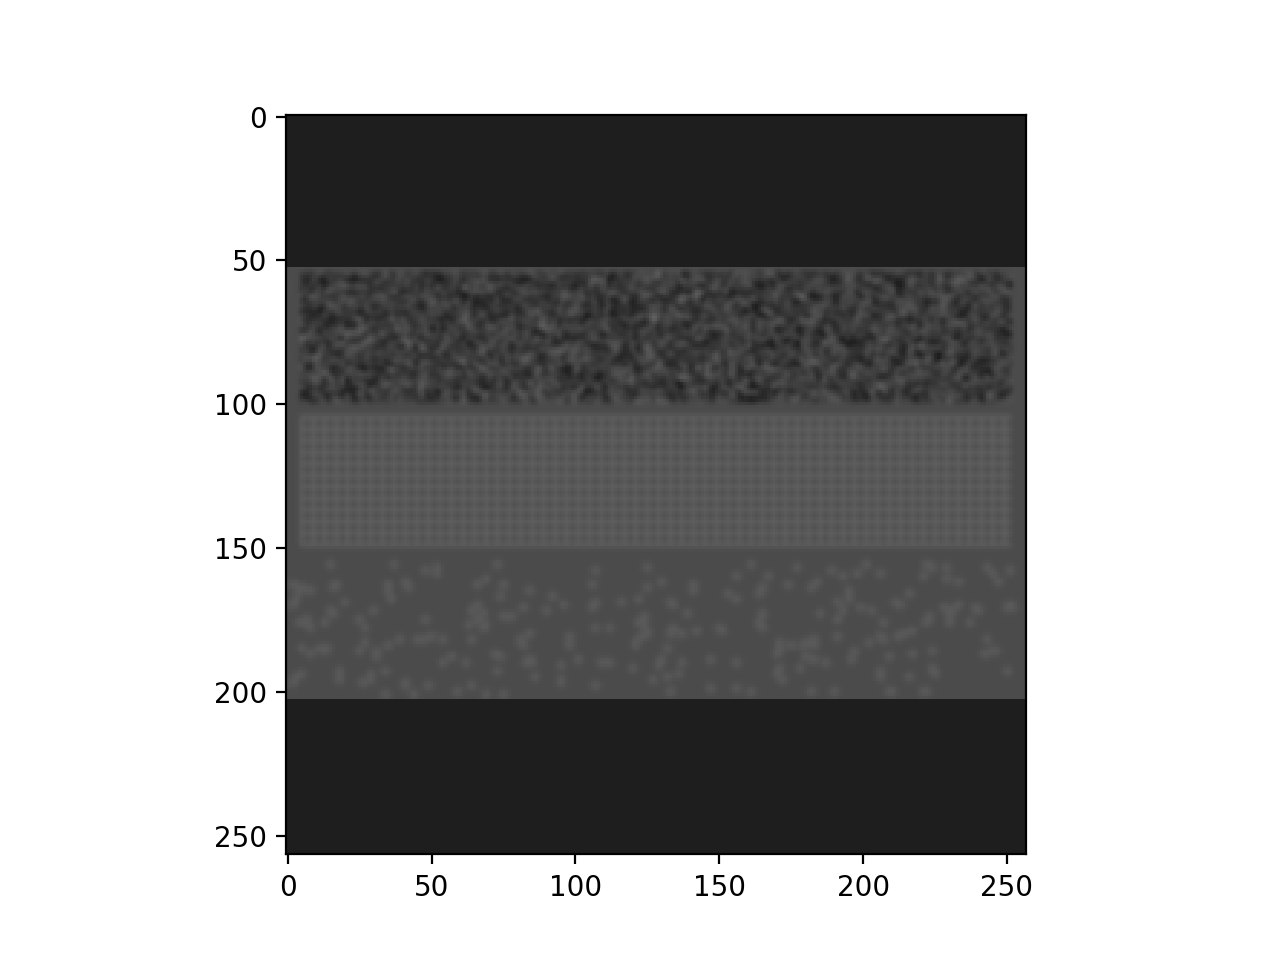

In [18]:
# Original with the crop sections removed

high_hm = img_heightmap.copy()
high_hm[:low_start_idx, :, :] = hm_min
high_hm[med_final_idx:, :, :] = hm_min

plt.imshow(high_hm)

In [20]:
high_hm_path = 'terrain-heightmap-high.png'
plt.imsave(high_hm_path, high_hm)